Import required libraries

In [58]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Reading the train and the test data 

In [59]:
# Reading the data
df = pd.read_csv(r'D:\VIT-AP\Conference_Paper\Final Paper\DataSets\train.csv')
val_df = pd.read_csv(r'D:\VIT-AP\Conference_Paper\Final Paper\DataSets\test.csv')

In [60]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Check the shape of the train and the test data

In [61]:
print('The shape of the train data is', df.shape)
print('The shape of the test data is ', val_df.shape)

The shape of the train data is (7613, 5)
The shape of the test data is  (3263, 4)


Get the summany of the data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [63]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


We can see that 'keyword' and 'location' columns have some missing values

Dropping the location and keyword columns from the train and test data

In [64]:
df.drop(['keyword','location'], axis=1, inplace=True)
val_df.drop(['keyword','location'], axis=1, inplace=True)
print(df.shape)


(7613, 3)


Check the target column values

In [65]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

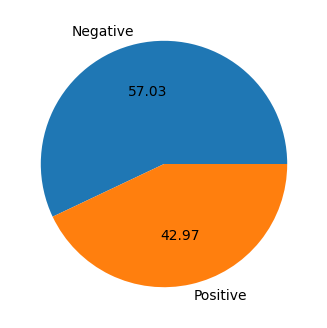

In [39]:
plt.figure(figsize=(9,4))
plt.pie(df['target'].value_counts(),labels=['Negative','Positive'],autopct="%0.2f")
plt.show()

In [66]:
df.text[:10]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
5    #RockyFire Update => California Hwy. 20 closed...
6    #flood #disaster Heavy rain causes flash flood...
7    I'm on top of the hill and I can see a fire in...
8    There's an emergency evacuation happening now ...
9    I'm afraid that the tornado is coming to our a...
Name: text, dtype: object

Cleaning text

In [67]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import re

In [68]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
porter = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ich07\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
def preprocess(text, stopwords=STOPWORDS):
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r"\b(" + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub("", text)

    # Remove words in parenthesis
    text = re.sub(r"\([^)]*\)", "", text)

    # Spacing and filters
    text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)
    text = re.sub("[^A-Za-z0-9]+", " ", text) # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()

    return text


# Transfom the sentence in a list of words. 
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, 
                              reduce_len=True)

def tokenize(sentence):     
    sentence_tokens = tokenizer.tokenize(sentence)
    return sentence_tokens

# Convert the words in their stem. 
stemmer = PorterStemmer()
def stem_words(list_words):
    stemmed = []
    for word in list_words:
        stem_word = stemmer.stem(word)
        stemmed.append(stem_word)
    return stemmed

def seq_text(stemmed):
    return ' '.join(stemmed)

# This is the function that we are going to call to transform each tweet. 
def prepare_sentence(sentence):
    sentence_nomarks = preprocess(sentence)
    sentence_tokenized = tokenize(sentence_nomarks)
    words_stemmed = stem_words(sentence_tokenized)
    text = seq_text(words_stemmed)
    return text



#### Process the entire data

In [71]:
# Apply to dataframe
preprocessed_df = df.copy()
preprocessed_val_df = val_df.copy()

# Preparing the train and the test datasets
preprocessed_df['text'] = preprocessed_df['text'].apply(prepare_sentence)
preprocessed_val_df['text'] = preprocessed_val_df['text'].apply(prepare_sentence)

preprocessed_df.head()

,id,text,target
0,1,deed reason earthquak may allah forgiv us,1
1,4,forest fire near la rong sask canada,1
2,5,resid ask shelter place notifi offic evacu she...,1
3,6,13 000 peopl receiv wildfir evacu order califo...,1
4,7,got sent photo rubi alaska smoke wildfir pour ...,1


<!-- > Roadmap:<br/>
>> I - Comparison of different feature engineering methods (text representation)<br/>
>>> Traditional approaches<br/>
>>>> 1- Bag-of-words<br/>
>>>> 2- Tf-Idf (Term Frequency - Inverse Document Frequency)<br/>
>>> Advanced Approaches<br/>
>>>> 3- Latent Semantic Analysis<br/>
>>>> 4- Continuous Bag of words<br/>
>>>> 5- Continuous Skip-Gram<br/>
>>>> 6- Fast Text <br/>
>>>> 7- Glove (Global Vectors)<br/>
>> II - Different models<br/>
>>> Traditional approaches<br/>
>>>> 1- Train a Random Forest model<br/>
>>>> 2- Train a Gradient Descent Boosting Model<br/>
>>> Comparison of different sequence models<br/>
>>>> 3- GRU (Gated Recurrent Unit)<br/>
>>>> 4- LSTM (Long Short Term Memory)<br/>
>>>> 5- Bi-dorectional LSTM/GRU<br/>
>>>> 6- Bi-dorectional LSTM/GRU with attention mechanism<br/>
>>> Transformers<br/>
>>>> 7- Fine-tune Bi-directional Encoder Representation Transformer (BERT)<br/> -->


> Roadmap:
* I - Comparison of different feature engineering methods (text representation)
    + Traditional approaches
        - 1- Bag-of-words
        - 2- Tf-Idf (Term Frequency - Inverse Document Frequency)
    + Advanced Approaches
        - 3- Latent Semantic Analysis
        - 4- Continuous Bag of words
        - 5- Continuous Skip-Gram
        - 6- Fast Text
        - 7- Glove (Global Vectors)
* II - Different models
    + Traditional approaches
        - 1- Train a Random Forest model
        - 2- Train a Gradient Descent Boosting Model
    + Comparison of different sequence models
        - 3- GRU (Gated Recurrent Unit)
        - 4- LSTM (Long Short Term Memory)
        - 5- Bi-dorectional LSTM/GRU
        - 6- Bi-dorectional LSTM/GRU with attention mechanism
    + Transformers
        - 7- Fine-tune Bi-directional Encoder Representation Transformer (BERT)

In [99]:
# Importing Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec, FastText

bog_vec = CountVectorizer(max_features=500)
tfidf_vec = TfidfVectorizer(max_features=500)
component = 500 # Default value
lsa_vec = TruncatedSVD(component)

# Use .todense() to reduce space of saving

# Bag-of-words Representation
bog = lambda text : bog_vec.fit_transform(text).todense()

# Tf-Idf Representation
tfidf = lambda text : tfidf_vec.fit_transform(text).todense()

#  Latent Semantic Analysis Representation
# In LSA reprensentation, we are going to use bag-of-words matrix
def lsa(text):
    # Default value
    bog =  bog_vec.fit_transform(text)
    lsa = lsa_vec.fit_transform(bog)
    return lsa

# Continuous Bag of words and Skip gram Representation 
# if sg == 0  -> CBOW and if sg == 1 -> skip gram
def embeddings(size, window, min_count, workers, sg):
    embedding = Word2Vec(vector_size = size, window = window,
                    min_count = min_count, workers = workers, sg = sg)
    return embedding
    
# Fast Text Representation
def fast_text(size, window, min_count, workers):
    model = FastText(vector_size = size, window = window,
                    min_count = min_count, workers = workers)
    return model

# # Glove Representation
# def glove()


##### Show the different representation examples

In [100]:
bog(preprocessed_df['text']).shape

tfidf(preprocessed_df['text']).shape

lsa(preprocessed_df['text']).shape

cbow = embeddings(size=500,window=10,min_count=2,workers=8,sg=0)
cbow.build_vocab(corpus_iterable=preprocessed_df['text'])
cbow.train(corpus_iterable=preprocessed_df['text'], total_examples=cbow.corpus_count, epochs=10)

skip_gram = embeddings(size=500,window=10,min_count=2,workers=8,sg=0)
skip_gram.build_vocab(corpus_iterable=preprocessed_df['text'])
skip_gram.train(corpus_iterable=preprocessed_df['text'], total_examples=cbow.corpus_count, epochs=10)

fast_text = fast_text(size=500,window=10,min_count=2,workers=8)
fast_text.build_vocab(corpus_iterable=preprocessed_df['text'])
fast_text.train(corpus_iterable=preprocessed_df['text'], total_examples=cbow.corpus_count, epochs=10)

(1064273, 5285240)

In [101]:
print('''
    Bag Of Words shape {}\n
    TF-IDF shape {}\n 
    Latent Semantic Analysis shape {} \n 
    Continuous Bag of Words shape {} \n
    Skip-Gram shape {} \n
    Fast Text shep {}
'''.format(bog(preprocessed_df['text']).shape,
           tfidf(preprocessed_df['text']).shape,
           lsa(preprocessed_df['text']).shape,
           (df.shape[0], cbow.vector_size),
           (df.shape[0], skip_gram.vector_size),
           (df.shape[0], fast_text.vector_size))
)


    Bag Of Words shape (7613, 500)

    TF-IDF shape (7613, 500)
 
    Latent Semantic Analysis shape (7613, 500) 
 
    Continuous Bag of Words shape (7613, 500) 

    Skip-Gram shape (7613, 500) 

    Fast Text shep (7613, 500)



#### Sentence vector using different reprensentation

In [110]:
# Using bag of words
print(bog(preprocessed_df['text'])[0])
# Using Tf-Idf
print(tfidf(preprocessed_df['text'])[0])
# Using Latent Semantic Analysis
print(lsa(preprocessed_df['text'])[0])
# Using Continuous bag of words
print(cbow.wv.get_sentence_vector(preprocessed_df['text'][0]))
# Using Skip gram
print(skip_gram.wv.get_sentence_vector(preprocessed_df['text'][0]))
# Using Fast Text
print(fast_text.wv.get_sentence_vector(preprocessed_df['text'][0]))


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [18]:
import collections
from sklearn.model_selection import train_test_split

In [19]:
TRAIN_SIZE = 0.7
TEST_SIZE = 0.3

In [20]:
def train_test_split(X, y, train_size):
    '''Split dataset into train and test'''
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    return X_train, X_test, y_train, y_test


In [21]:
# Data
X = df['text'].values
y = df['target'].values
